In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_train.csv")

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [5]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Term"] = df["Term"].fillna(df["Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [6]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [7]:
def encode(x):
    if x == "Y":
        return 1
    else:
        return 0

In [8]:
df["Status"] = df.apply(lambda x: encode(x["Status"]), axis=1)

In [9]:
def encode2(x):
    if x == "Male":
        return 1
    else:
        return 0

In [10]:
df["Gender"] = df.apply(lambda x: encode2(x["Gender"]),axis=1)

In [11]:
def encode3(x):
    if x == "Yes":
        return 1
    else:
        return 0

df["Married"] = df.apply(lambda x: encode3(x["Married"]), axis=1)

In [12]:
def encode4(x):
    if x == "Graduate":
        return 1
    else:
        return 0

df["Education"] = df.apply(lambda x: encode4(x["Education"]), axis=1)

In [13]:
def encode5(x):
    if x == "Yes":
        return 1
    else:
        return 0

df["Self_Employed"] = df.apply(lambda x: encode5(x["Self_Employed"]), axis=1)

In [14]:
def encode6(x):
    if x == "Urban":
        return 2
    elif x == "Semiurban":
        return 1
    else:
        return 0

df["Area"] = df.apply(lambda x: encode6(x["Area"]), axis=1)

In [15]:
def encode7(x):
    if x == "3+":
        return 3
    elif x == "2":
        return 2
    elif x == "1":
        return 1
    else:
        return 0

df["Dependents"] = df.apply(lambda x: encode7(x["Dependents"]), axis=1)

In [16]:
#Bagimli ve bagimsiz degiskenleri atayalim
X = df.drop("Status", axis="columns")
Y = df["Status"]

In [17]:
#egitim ve test olarak bolelim
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.25)

In [19]:
model = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [20]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [21]:
dogruluk = accuracy_score(y_pred, y_test)
dogruluk

0.8051948051948052

In [22]:
p = model.predict_proba(X_test)
p[:5]

array([[0.25170247, 0.74829753],
       [0.33074634, 0.66925366],
       [0.17130805, 0.82869195],
       [0.24758674, 0.75241326],
       [0.04527374, 0.95472626]])

In [23]:
olma_olasiligi = p[:,1]
kredi_skoru = olma_olasiligi*2000
kredi_skoru[:10]

array([1496.59506851, 1338.50732352, 1657.38389572, 1504.82652016,
       1909.45251193, 1479.31264906, 1688.75552183,  964.4639381 ,
        613.7444357 , 1597.19227696])

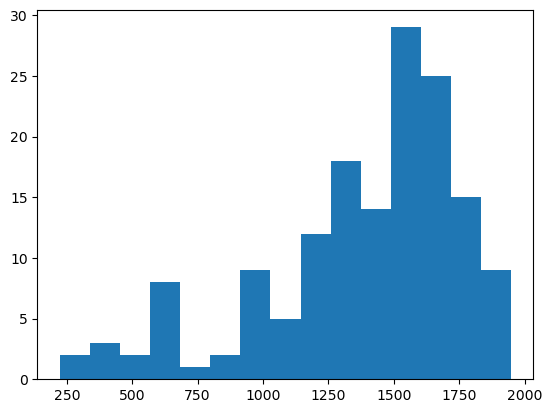

In [24]:
plt.hist(kredi_skoru, bins=15);